In [1]:
using BenchmarkTools
using Combinatorics

include("../phase1/node.jl")
include("../phase1/edges.jl")
include("../phase1/graph.jl")
include("../phase1/read_stsp.jl")
include("../phase2/comp_connexes.jl")
include("../phase1/main.jl")
include("../phase2/queue.jl")
include("../phase2/heuristics.jl")
include("../phase2/Kruskal.jl")
include("../phase2/prims_algorithm.jl")
include("../phase3/hk.jl")
include("../phase3/rsl.jl")

Graph Test has 9 nodes.
Node a, data: 

[0.0]
Node b, data: [0.0]
Node c, data: [0.0]
Node d, data: [0.0]
Node e, data: [0.0]
Node f, data: [0.0]
Node g, data: [0.0]
Node h, data: [0.0]
Node i, data: [0.0]
Graph Test has 8 edges.
Arête de h à a, poids: 8.0
Arête de a à b, poids: 4.0
Arête de f à c, poids: 4.0
Arête de c à d, poids: 7.0
Arête de d à e, poids: 9.0
Arête de f à g, poids: 2.0
Arête de g à h, poids: 1.0
Arête de c à i, poids: 2.0
sum of weights37.0
Graph 

Test has 9 nodes.
Node a, data: [0.0]
Node b, data: [0.0]
Node c, data: [0.0]
Node d, data: [0.0]
Node e, data: [0.0]
Node f, data: [0.0]
Node g, data: [0.0]
Node h, data: [0.0]
Node i, data: [0.0]
Graph Test has 8 edges.
Arête de h à a, poids: 8.0
Arête de a à b, poids: 4.0
Arête de f à c, poids: 4.0
Arête de c à d, poids: 7.0
Arête de d à e, poids: 9.0
Arête de f à g, poids: 2.0
Arête de g à h, poids: 1.0
Arête de c à i, poids: 2.0
sum of weights37.0
Graph 

Test has 9 nodes.
Node a, data: [0.0]
Node b, data: [0.0]
Node c, data: [0.0]
Node d, data: [0.0]
Node e, data: [0.0]
Node f, data: [0.0]
Node g, data: [0.0]
Node h, data: [0.0]
Node i, data: [0.0]
Graph Test has 8 edges.
Arête de h à a, poids: 8.0
Arête de a à b, poids: 4.0
Arête de f à c, poids: 4.0
Arête de c à d, poids: 7.0
Arête de d à e, poids: 9.0
Arête de f à g, poids: 2.0
Arête de g à h, poids: 1.0
Arête de c à i, poids: 2.0
sum of weights37.0


rsl

In [2]:
graphe_test = Graph("Test",Node{Vector{Float64}}[],Edge{Int,Vector{Float64}}[])

#Nodes 
nodea = Node("a",[0.])
nodeb = Node("b",[0.])
nodec = Node("c",[0.])
noded = Node("d",[0.])
nodee = Node("e",[0.])
nodef = Node("f",[0.])
nodeg = Node("g",[0.])
nodeh = Node("h",[0.])
nodei = Node("i",[0.])
node_list = [nodea,nodeb,nodec, noded,nodee, nodef, 
                nodeg, nodeh, nodei]

#Edges
edge1 = Edge(nodea,nodeb, 4)
edge2 = Edge(nodea,nodeh, 8)
edge3 = Edge(nodeb, nodeh, 11)
edge4 = Edge(nodeb, nodec, 8)
edge5 = Edge(nodeh, nodei, 7)
edge6 = Edge(nodeh, nodeg, 1)
edge7 = Edge(nodeg, nodei, 6)
edge8 = Edge(nodeg, nodef, 2)
edge9 = Edge(nodec, nodef, 4)
edge10 = Edge(nodei, nodec, 2)
edge11 = Edge(nodef, nodee, 10)
edge12 = Edge(nodee, noded, 9)
edge13 = Edge(nodec,noded, 7)
edge14 = Edge(noded, nodef, 14)
edge_list = [edge1, edge2, edge3, edge4, edge5, edge6,
                edge7, edge8, edge9, edge10, edge11,
                edge12, edge13, edge14]

##Construction du graphe
for i in node_list
    add_node!(graphe_test,i)
end
for i in edge_list
    add_edge!(graphe_test, i)
end


## Algorithme de Rosenkrantz, Stearns et Lewis
Dans l'algorithme RSL, on doit parcourir l'arbre obtenu en préordre. Nous avons donc implémenté une fonction qui parcours l'arbre et qui renvoie la liste des noeuds dans l'ordre visité

In [3]:
""" Parcours un arbre en préordre et retourne la liste des noeuds dans l'ordre dans lequel ils ont été visités."""
function parcours_preordre(tree, racine)
    current_node = racine
    parcours_liste = [] #Contient l'ordre dans lequel les noeuds sont visités
    completed_nodes = [] #Contient tous les noeuds dont tous les enfants ont été visités
    i = 1
    while true
        change = false
        if !(current_node in parcours_liste) #Si le noeud n'a pas encore été visité
            push!(parcours_liste, current_node)  #On l'ajoute à l'ordre de visite
        end

        for child in children(tree, current_node)
            if !(child in parcours_liste) #Si l'enfant n'a pas encore été visité
                current_node = child #Il sera le prochain noeud visité
                change = true
                break
            end
        end

        if change == false  #Si le noeud n'a aucun enfant qui n'a pas encore été visité
            push!(completed_nodes,current_node)  #On l'ajoute à la liste des noeuds complétés
            if length(nodes(tree)) == length(completed_nodes) #Stoppe l'algorithme lorsque tous les noeuds et tous leurs enfants ont été visités.
                break
            end
            current_node = parent(tree, current_node) #On remonte l'arbre
        end

    end
    return parcours_liste
end

parcours_preordre

En utilisant cette fonction ainsi que les algorithmes de Kruskal et de Prim de la phase 2, nous avons implémenté l'algorithme de RSL. La fonction prend en entrée un graphe, sa racine et la méthode spécifiée entre Kruskal et Prim. Si la méthode n'est pas spécifiée, il favorise Prim. On utilise la méthode spécifiée pour calculer l'arbre de recouvrement minimum.

On parcourt ensuite cet arbre en préordre, puis on crée un nouvel arbre en suivant l'ordre établi où chaque noeud est le parent du suivant dans la liste. On transforme l'arbre en graphe et on ajoute une dernière arête entre le dernier noeud et la racine pour créer un cycle. 

L'algorithme est testé sur différents graphe plus loin dans le rapport.

In [4]:
""" Applique l'algorithme RSL sur un graphe et retourne un nouveau graphe contenant une tournée.
Spécifier la méthode : 'Prim' ou 'Kruskal' """
function rsl(graph::Graph{Y,T},start_node::Node{Y}, method::String="Prim") where {Y,T}

    if method == "Kruskal"
        tree, racine = kruskal(graph, start_node_name = name(start_node)) #Détermine un arbre de recouvrement minimum
    else
        tree, racine = prims_algorithm(graph, start_node_name = name(start_node)) #Détermine un arbre de recouvrement minimum
    end
    
    nodes_list = parcours_preordre(tree, racine) #Parcours l'arbre de recouvrement minimum
    cycle_tree = Tree("Cycle", TreeNode{Y}[])
    last_node = racine
    for node in nodes(tree)  #Construit un arbre contenant la tournée
        add_node!(cycle_tree, node)     
    end

    for node in nodes_list
        idx1 = last_node.index
        idx2 = node.index
        if idx1 != idx2
            distance = adjacency_dict(graph)[idx1][idx2]
            change_dist!(node, distance)
        end
        last_node.children = Vector{Int}[]
        add_child!(last_node,node)
        
        last_node = node
    end
    
    add_child!(last(nodes_list), racine)
    cycle = tree_to_graph(cycle_tree, racine)   #Transforme l'arbre en graphe
    idx1 = index(racine)    #Ajoute l'arête entre le dernier noeud et la racine
    idx2 = parent_loc(racine)
    add_edge!(cycle, Edge(nodes(cycle)[parent_loc(racine)], nodes(cycle)[parent_loc(nodes_list[2])], adjacency_dict(graph)[idx1][idx2]))

    return cycle
end

rsl

## Algorithm de Held et Karp 

Below are the functions for the LK heuristic. in order to calculate the one tree, we implemented functions to find all of the leaves in a tree, and another to return the closest leaves in a tree.

In [5]:

"""Gets all of the leaves in a tree"""
function get_leaves(tree::Tree)
    leaves = []
    for node in nodes(tree)
        if length(children(tree, node)) == 0
            push!(leaves, node)
        end
    end
    return leaves
end

"""Searches the tree for the closest leaves to a given node outside of the tree"""
function get_closest_leaves(tree::Tree, graph::Graph,departure_node::Node)
    ##Gets all of the nodes with tree get_closest_leaves
    shortest_edge_vec = Vector{Edge}(undef, 2)
    shortest_dist_vec = Vector{Float64}([Inf, Inf])
    leaves = get_leaves(tree)
    #Goes through graph and takes out edges that are connected to the start node and a leaf
    for  edge in edges(graph)
        node1, node2 = nodes(edge)
        for leaf in leaves
                if (name(node1) == name(departure_node) || name(node2) == name(departure_node)) && (name(node1) == name(leaf) || name(node2) == name(leaf))
                #copies over the previous best to second best
                if weight(edge) < shortest_dist_vec[1]
                    if shortest_dist_vec[1]< shortest_dist_vec[2]
                        shortest_dist_vec[2] = shortest_dist_vec[1]
                        shortest_edge_vec[2] = shortest_edge_vec[1]
                    end
                    shortest_dist_vec[1] = weight(edge)
                    shortest_edge_vec[1] = edge
                elseif weight(edge) < shortest_dist_vec[2]
                    shortest_dist_vec[2] = weight(edge)
                    shortest_edge_vec[2] = edge
                end
            end
        end
    end
    return  shortest_edge_vec[1], shortest_edge_vec[2]
end


"""Returns the one tree for the hk heuristic"""
function find_one_tree(graph::Graph, departure_node::Node; edge_selector::String ="leaves", tree_algorithm::Function = prims_algorithm)
    #Copies graph to feed into prim's algorithm
    start_graph = deepcopy(graph)
    #removes the departure node from the graph and saves its index
    idx = remove_node!(start_graph, departure_node)
    remove_edges!(start_graph, departure_node)
    #uses prims algorithm to find the one_tree
    one_tree, root = tree_algorithm(start_graph, start_node_name = name(departure_node))
    #converts the prims algorithm to a graph
    one_tree_graph = tree_to_graph(one_tree, root)
    #finds first and second shortest edge from the departure node
    if edge_selector == "leaves"
        shortest_edge_1, shortest_edge_2   = get_closest_leaves(one_tree, graph, departure_node)
    else
        shortest_edge_1, shortest_edge_2   = get_closest_edges(graph, departure_node)
    end
    #Adds the start node and the edges connecting to the tree
    add_node!(one_tree_graph, departure_node, idx)
    add_edge!(one_tree_graph,shortest_edge_1)
    add_edge!(one_tree_graph,shortest_edge_2)
    one_tree_distance = sum_of_weights(one_tree_graph)
    return one_tree_distance, one_tree_graph
end


"""Changes the edge weights of a graph given the pis"""
function update_edge_weights!(graph::Graph, pis::Vector{Float64})
    correspondance_dict = Dict()
    for (i, node) in enumerate(nodes(graph))
        correspondance_dict[name(node)] = i
    end
    for edge in edges(graph)
        node1, node2 = nodes(edge)
        node1_idx = correspondance_dict[name(node1)]
        node2_idx = correspondance_dict[name(node2)]
        new_weight = weight(edge) + pis[node1_idx] + pis[node2_idx]
        set_weight!(edge, new_weight)
    end
end

"""function that returns the departure node, if not nothing, else returns first node in graph"""
function default_departure_node_selector(graph::Graph, departure_node::Union{Node, Nothing} = nothing)
    if isnothing(departure_node)
        return nodes(graph)[1]
    end
    return departure_node
end

"""Function that chooses a random node to build the onetree"""
function random_departure_node_selector(graph::Graph,departure_node::Union{Node, Nothing} = nothing)
    return nodes(graph)[rand(1:length(nodes(graph)))]
end

"""subgradient heuristic for calculating a minimal tour"""
function lkh_subgradient(start_graph::Graph;  
    departure_node::Union{Node, Nothing} = nothing, 
    departure_node_selector::Function = default_departure_node_selector,
    t_k_method::String = "1/k", 
    tree_algorithm::Function = prims_algorithm,
    stop_k::Int = 100000)
    #initialisation of variables for tk calculation
    start_weight = sum_of_weights(start_graph)  
    no_nodes = length(nodes(start_graph))
    #choose starting node if none is given
    departure_node = departure_node_selector(start_graph, departure_node)
    graph = deepcopy(start_graph)
    k = 0
    t_k = 0
    w = -Inf
    pis = zeros(length(nodes(graph)))
    adjacency_list = adjacency_dict(graph)
    #Stops when v_k = 0 or we run oout of iterations
    while k < stop_k
        iter_time = time()
        total_distance, one_tree = find_one_tree(graph, departure_node, edge_selector = "leaves", tree_algorithm=tree_algorithm)
        weights_k = total_distance - 2 * sum(pis)
        w = max(w, weights_k)
        v_k = degree(one_tree) .- 2
        #Checks for stopping condition
        if v_k == zeros(length(nodes(graph)))
            return total_distance, one_tree
        end
        #Different methods for calculating step size
        if t_k_method == "1/k"
            t_k = 1/(k+1)
        elseif t_k_method == "sqrt"
            t_k = 10/ (sqrt(k+1))
        elseif t_k_method == "weights/k"
            t_k = start_weight/(100*no_nodes + k)
        else
            if k == 0
                t_k = start_weight/1000
            elseif mod(no_nodes, k) == 0
                t_k = start_weight/(1000* (k+1))
            end
        end
        #updates the pis
        pis = pis + t_k * v_k
        k = k + 1
        update_edge_weights!(graph, pis)
        if k % 20000 == 0
            #calculates the l1 norm of v_k vector
            v_k_norm  = sum(broadcast(abs, v_k))
            println("k = ", k," step= ", t_k, " time = ", time() - iter_time, " VK_norm ", v_k_norm )
        end
    end
    return Inf, nothing
end


lkh_subgradient

In [6]:


nodea = Node("a",[0.])
nodeb = Node("b",[0.])
nodec = Node("c",[0.])
noded = Node("d",[0.])
nodee = Node("e",[0.])
node_list = [nodea,nodeb,nodec, noded,nodee]
#Edges are fully connected
edge1 = Edge(nodea,nodeb, 3.)
edge2 = Edge(nodea,nodec, 2.)
edge3 = Edge(nodea, noded, 11.)
edge4 = Edge(nodea, nodee, 9.)
edge5 = Edge(nodeb, nodec, 1.)
edge6 = Edge(nodeb, noded, 12.)
edge7 = Edge(nodeb, nodee, 6.)
edge8 = Edge(nodec, noded, 6.)
edge9 = Edge(nodec, nodee, 4.)
edge10 = Edge(noded, nodee, 7.)
edge_list = [edge1, edge2, edge3, edge4, edge5, edge6,
                edge7, edge8, edge9, edge10]

tsp_test = Graph("Test",node_list,edge_list)
tsp_test

Graph{Vector{Float64}, Float64}("Test", Node{Vector{Float64}}[Node{Vector{Float64}}("a", [0.0]), Node{Vector{Float64}}("b", [0.0]), Node{Vector{Float64}}("c", [0.0]), Node{Vector{Float64}}("d", [0.0]), Node{Vector{Float64}}("e", [0.0])], Edge{Float64, Vector{Float64}}[Edge{Float64, Vector{Float64}}(Node{Vector{Float64}}("a", [0.0]), Node{Vector{Float64}}("b", [0.0]), 3.0), Edge{Float64, Vector{Float64}}(Node{Vector{Float64}}("a", [0.0]), Node{Vector{Float64}}("c", [0.0]), 2.0), Edge{Float64, Vector{Float64}}(Node{Vector{Float64}}("a", [0.0]), Node{Vector{Float64}}("d", [0.0]), 11.0), Edge{Float64, Vector{Float64}}(Node{Vector{Float64}}("a", [0.0]), Node{Vector{Float64}}("e", [0.0]), 9.0), Edge{Float64, Vector{Float64}}(Node{Vector{Float64}}("b", [0.0]), Node{Vector{Float64}}("c", [0.0]), 1.0), Edge{Float64, Vector{Float64}}(Node{Vector{Float64}}("b", [0.0]), Node{Vector{Float64}}("d", [0.0]), 12.0), Edge{Float64, Vector{Float64}}(Node{Vector{Float64}}("b", [0.0]), Node{Vector{Float64}}

In [7]:

#Fully connected graph with 7 edges
a = Node("a",[0.])
b = Node("b",[0.])
c = Node("c",[0.])
d = Node("d",[0.])
e = Node("e",[0.])
f = Node("f",[0.])
g = Node("g",[0.])
node_list = [a,b,c, d,e, f, g]
#Edges are fully connected
edge1 = Edge(a,b, 4.)
edge2 = Edge(a,c, 8.)
edge3 = Edge(a, d, 11.)
edge4 = Edge(a, e, 8.)
edge5 = Edge(a, f, 7.)
edge6 = Edge(a, g, 1.)
edge7 = Edge(b, c, 6.)
edge8 = Edge(b, d, 2.)
edge9 = Edge(b, e, 4.)
edge10 = Edge(b, f, 7.)
edge11 = Edge(b, g, 2.)
edge12 = Edge(c, d, 7.)
edge13 = Edge(c, e, 1.)
edge14 = Edge(c, f, 6.)
edge15 = Edge(c, g, 3.)
edge16 = Edge(d, e, 5.)
edge17 = Edge(d, f, 4.)
edge18 = Edge(d, g, 8.)
edge19 = Edge(e, f, 2.)
edge20 = Edge(e, g, 7.)
edge21 = Edge(f, g, 3.)
edge_list = [edge1, edge2, edge3, edge4, edge5, edge6,
                edge7, edge8, edge9, edge10, edge11,
                edge12, edge13, edge14, edge15, edge16,
                edge17, edge18, edge19, edge20, edge21]
#creates the graph
tsp_test2 = Graph("Test2",node_list,edge_list)

score, test2_graph = lkh_subgradient(tsp_test2, t_k_method = "1/k")
# score

(28.0, Graph{Vector{Float64}, Float64}("Test2", Node{Vector{Float64}}[Node{Vector{Float64}}("a", [0.0]), Node{Vector{Float64}}("b", [0.0]), Node{Vector{Float64}}("c", [0.0]), Node{Vector{Float64}}("d", [0.0]), Node{Vector{Float64}}("e", [0.0]), Node{Vector{Float64}}("f", [0.0]), Node{Vector{Float64}}("g", [0.0])], Edge{Float64, Vector{Float64}}[Edge{Float64, Vector{Float64}}(Node{Vector{Float64}}("g", [0.0]), Node{Vector{Float64}}("c", [0.0]), 3.0), Edge{Float64, Vector{Float64}}(Node{Vector{Float64}}("b", [0.0]), Node{Vector{Float64}}("d", [0.0]), 2.0), Edge{Float64, Vector{Float64}}(Node{Vector{Float64}}("c", [0.0]), Node{Vector{Float64}}("e", [0.0]), 1.0), Edge{Float64, Vector{Float64}}(Node{Vector{Float64}}("e", [0.0]), Node{Vector{Float64}}("f", [0.0]), 2.0), Edge{Float64, Vector{Float64}}(Node{Vector{Float64}}("b", [0.0]), Node{Vector{Float64}}("g", [0.0]), 2.0), Edge{Float64, Vector{Float64}}(Node{Vector{Float64}}("a", [0.0]), Node{Vector{Float64}}("f", [0.0]), 7.0), Edge{Float6

In [8]:
score, test1_graph = lkh_subgradient(tsp_test, t_k_method = "1/k")


(33.0, Graph{Vector{Float64}, Float64}("Test", Node{Vector{Float64}}[Node{Vector{Float64}}("a", [0.0]), Node{Vector{Float64}}("b", [0.0]), Node{Vector{Float64}}("c", [0.0]), Node{Vector{Float64}}("d", [0.0]), Node{Vector{Float64}}("e", [0.0])], Edge{Float64, Vector{Float64}}[Edge{Float64, Vector{Float64}}(Node{Vector{Float64}}("b", [0.0]), Node{Vector{Float64}}("c", [0.0]), 1.0), Edge{Float64, Vector{Float64}}(Node{Vector{Float64}}("c", [0.0]), Node{Vector{Float64}}("d", [0.0]), 7.0), Edge{Float64, Vector{Float64}}(Node{Vector{Float64}}("b", [0.0]), Node{Vector{Float64}}("e", [0.0]), 5.0), Edge{Float64, Vector{Float64}}(Node{Vector{Float64}}("a", [0.0]), Node{Vector{Float64}}("e", [0.0]), 9.0), Edge{Float64, Vector{Float64}}(Node{Vector{Float64}}("a", [0.0]), Node{Vector{Float64}}("d", [0.0]), 11.0)]))

## Testing algorithms on TSP instances

On connaît les longueurs optimales des circuits pour les différents fichiers tsp. On peut donc tester les différents algorithmes sur les différents fichier et comparer nos résultats avec les tournées optimales. 

**Longueur des tournées optimales** : 
- bays29.tsp : 2020
- swiss42.tsp : 1273
- gr17.tsp : 2085

### Test de RSL sur bays29.tsp avec l'algorithme de Kruskal

Reading of header : ✓
Reading of nodes : ✓
Reading of edges : ✓
sum of weights 

2661.0


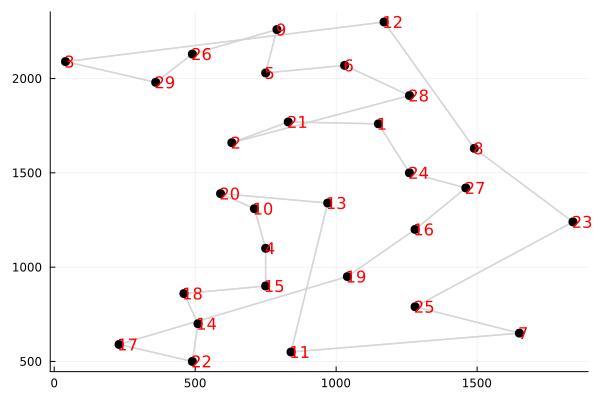

In [9]:
bays_29 = graph_from_tsp("../../instances/stsp/bays29.tsp","graphe")[1]
cycle = rsl(bays_29, nodes(bays_29)[1], "Kruskal")
println("sum of weights ", sum_of_weights(cycle))
plot_graph(cycle)


### Test de RSL sur bays29.tsp avec l'algorithme de Prim

sum of weights 2564.0


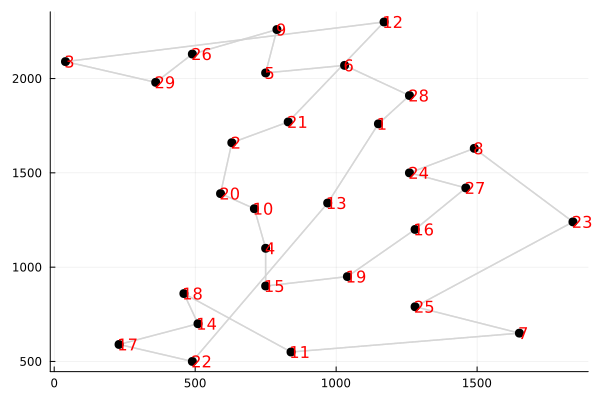

In [10]:
cycle = rsl(bays_29, nodes(bays_29)[1], "Prims")
println("sum of weights ", sum_of_weights(cycle))
plot_graph(cycle)

### testing hk sur gr17 et bays29

Nous testons ici l'algorithme lkh sur la plus petite instance tsp.Nous avons laissé l'algorithme fonctionner pendant une heure et il ne converge pour aucune des stratégies . (nous avons vérifié la norme du vecteur tk pour voir si elle diminuait, mais ce n'est pas le cas/). Voici quelques exemples de ce que cela donne pour 100 000 itérations.

In [11]:
gr17_graph, gr17_nodes = graph_from_tsp("../../instances/stsp/gr17.tsp","graphe1")
println("running h_k_algorithm on gr17")
start_node = nodes(gr17_graph)[4]
@time total_distance, one_tree = lkh_subgradient(gr17_graph, t_k_method = "1/k",departure_node=start_node, tree_algorithm = kruskal)


Reading of header : ✓
Reading of nodes : ✓
Reading of edges : ✓
running h_k_algorithm on gr17
k = 

10000 step= 0.0001 time = 0.019526004791259766 VK_norm 20


k = 20000 step= 5.0e-5 time = 0.0004999637603759766 VK_norm 22
k = 

30000 step= 3.3333333333333335e-5 time = 0.0004990100860595703 VK_norm 24


k = 40000 step= 2.5e-5 time = 0.0004968643188476562 VK_norm 22
k = 

50000 step= 2.0e-5 time = 0.0004971027374267578 VK_norm 22


k = 60000 step= 1.6666666666666667e-5 time = 0.0005190372467041016 VK_norm 26
k = 

70000 step= 1.4285714285714285e-5 time = 0.0004949569702148438 VK_norm 22


k = 80000 step= 1.25e-5 time = 0.00049591064453125 VK_norm 24
k = 

90000 step= 1.1111111111111112e-5 time = 0.00049591064453125 VK_norm 24


k = 100000 step= 1.0e-5 time = 0.0004971027374267578 VK_norm 22
 50.975522 seconds (164.63 M allocations: 10.271 GiB, 1.51% gc time, 0.30% compilation time)


(Inf, nothing)

In [12]:
@time total_distance, one_tree = lkh_subgradient(gr17_graph, t_k_method = "weights/k", tree_algorithm = prims_algorithm)

k = 10000 step= 3.192238652876314 time = 0.0006198883056640625 VK_norm 26
k = 

20000 step= 1.7210931379326235 time = 0.00436091423034668 VK_norm 26


k = 30000 step= 1.1781444209596517 time = 0.0006039142608642578 VK_norm 26
k = 

40000 step= 0.8956090074102496 time = 0.0006299018859863281 VK_norm 26


k = 50000 step= 0.7223737403044547 time = 0.0006151199340820312 VK_norm 24
k = 

60000 step= 0.6052934407364787 time = 0.0006060600280761719 VK_norm 24


k = 70000 step= 0.5208719786886846 time = 0.0006170272827148438 VK_norm 26
k = 

80000 step= 0.45711697817598745 time = 0.0006129741668701172 VK_norm 24


k = 90000 step= 0.4072672548228443 time = 0.0006060600280761719 VK_norm 26
k = 

100000 step= 0.3672209166265155 time = 0.0006098747253417969 VK_norm 26
 62.553783 seconds (347.63 M allocations: 17.670 GiB, 2.50% gc time, 0.01% compilation time)


(Inf, nothing)

In [13]:
@time total_distance, one_tree = lkh_subgradient(gr17_graph, t_k_method = "sqrt", departure_node_selector = random_departure_node_selector)

In [ ]:
@time bays_res = lkh_subgradient(bays_29, t_k_method="weights/k", tree_algorithm= kruskal, departure_node_selector = random_departure_node_selector)

# TSP solver function

Voici une fonction qui accepte en entrée un chemin d'accès au fichier tsp et les solveurs souhaités par l'utilisateur

In [ ]:
function solve_tsp(file_path::String; tsp_method::String = "rsl", start_node_index::Union{Int, Nothing}=nothing, departure_node_selector::Function = random_departure_node_selector, t_k_method::String = "1/k", tree_algorithm::String = "kruskal")
    tsp_graph, tsp_nodes = graph_from_tsp(file_path,"graphe1")
    if isnothing(start_node_index)
        start_node = nodes(tsp_graph)[1]
    else
        start_node = nodes(tsp_graph)[start_node_index]
    end
    if tsp_method == "h_k_algorithm"
        if tree_algorithm =="kruskal"
            println("running h_k_algorithm on ", file_path, " with kruskal")
            @time total_distance, one_tree = lkh_subgradient(tsp_graph, t_k_method = t_k_method, departure_node_selector = departure_node_selector, tree_algorithm = kruskal)
            println(total_distance)
            return total_distance, one_tree
        else
            println("running h_k_algorithm on ", file_path, " with prims")
            @time total_distance, one_tree = lkh_subgradient(tsp_graph, t_k_method = t_k_method, departure_node_selector = departure_node_selector, tree_algorithm = prims_algorithm)
            println(total_distance)
            return total_distance, one_tree
        end
    elseif tsp_method == "rsl"
        if tree_algorithm =="kruskal"
            println("running rsl on ", file_path, " with kruskal")
            @time cycle = rsl(tsp_graph,start_node, "Kruskal")
            println("sum of weights ", sum_of_weights(cycle))
            return sum_of_weights(cycle), cycle
        else
            println("running rsl on ", file_path, " with prims")
            @time cycle = rsl(tsp_graph,start_node, "Prims")
            println("sum of weights ", sum_of_weights(cycle))
            return sum_of_weights(cycle), cycle
        end
    else
        println("Invalid tsp method")
    end
end

In [ ]:
solve_tsp("../../instances/stsp/bays29.tsp", tsp_method = "h_k_algorithm", t_k_method="weights/k", tree_algorithm = "prims")

In [ ]:
solve_tsp("../../instances/stsp/bays29.tsp", tsp_method = "rsl", tree_algorithm = "kruskal")